# Chapter2. 머신러닝 프로젝트 처음부터 끝까지

이 장에서는 여러분이 부동산 회사에 막 고용된 데이터 과학자라고 가정하고 예제 프로젝트의 처음부터 끝까지 진행해보겠습니다. 진행할 주요 단계는 다음과 같습니다. 

1. 큰 그림을 봅니다.
2. 데이터를 구합니다. 
3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다.
4. 머신러닝 알고리즘을 위해 데이터를 준비합니다.
5. 모델을 선택하고 훈련시킵니다.
6. 모델을 상세하게 조정합니다.
7. 솔루션을 제시합니다. 
8. 시스템을 론칭하고 모니터링하고 유지 보수합니다.

### 210120 기록

# 2.1 실제 데이터로 작업하기

https://sexydatadesigner.tistory.com/77

블로그에 내용정리해두었습니다. 


# 2.2 큰 그림 보기 

## 2.2.1 문제 정의 

"비즈니스의 목적이 정확히 무엇인가요?"

상사가 이 모델의 출력(구역의 중간 주택 가격에 대한 예측)이 여러가지 다른 신호(signal)과 함께 다른 머신러닝 시스템에 입력으로 사용된다고합니다. 뒤따르는 시스템이 해당 지역에 투자할 가치가 있는지 결정합니다. 이 결정이 수익에 직결되기 때문에 올바르게 예측하는 것은 매우 중요합니다. 

책그림 2.2 참고 (p70)

"현재 솔루션은 어떻게 구성되어 있나요?" 

만약 있다면 현재 상황은 문제 해결 방법에 대한 정보는 물론이고 참고 성능으로도 사용할 수 있습니다. 상사가 현재는 구역 주택 가격을 전문가가 수동으로 추정한다고 알려주었습니다. 한 팀이 구역에 관한 최신 정보를 모으고 있는데 중간 주택 가격을 얻을 수 없을 때는 복잡한 규칙을 사용하여 추정합니다. 

이는 비용과 시간이 많이 들고 추정 결과도 썩 좋지 않습니다. 실제 중간 주택 가격을 구해보면 팀에서 추정한 것이 20%이상 벗어났음을 알게 될 때가 많습니다. 이런 이유로 회사는 구역의 데이터를 기반으로 중간 주택 가격을 예측하는 모델을 훈련시키는 쪽이 유용하다고 생각합니다. 인구조사 데이터에는 다른 데이터는 물론 수천 개 구역의 중간 주택 가격을 포함하므로 이 작업에 매우 적합한 데이터셋으로 보입니다. 

레이블된 훈련 샘플이 있으니(각 샘플이 기대 출력값, 즉 구역의 중간 주택 가격을 가지고 있습니다) 이는 전형적인 지도 학습 작업입니다. 또한 값을 예측해야 하므로 전형적인 회귀 문제입니다. 좀 더 구체적으로는 예측에 사용할 특성이 여러 개(구역의 인구, 중간 소득 등)이므로 다중 회귀(multiple regression) 문제 입니다. 또한 각 구역마다 하나의 값을 예측하므로 단변량 회귀(univariate regression)입니다. 구역마다 여러 값을 예측한다면 다변량 회귀(multivariate regression) 문제 입니다. 마지막으로 이 시스템으로 들어오는 데이터에 연속적인 흐름이 없으므로 빠르게 변하는 데이터에 적응하지 않아도 되고, 데이터가 메모리에 들어갈 만틈 충분히 작으므로 일반적인 배치 학습이 적절합니다. 

## 2.2.2 성능 측정 지표 선택 

회귀 문제의 전형적인 성능 지표는 평균 제곱근 오차(Root Mean Square Error-RMSE)

이상치로 보이는 구역이 많다고 보여지면, 평균 절대 오차(Mean Absolute Error - MAE)를 쓴다.

둘 다 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법

## 2.2.3 가정검사 

카테고리가 아닌 실제 가격을 사용하는지 확인하기. 가정을 나열하고 검사받기 

# 2.3 데이터 가져오기 

## 2.3.1 작업환경 만들기

이미 지금 여기 작업하고 있어서 생략

## 2.3.2 데이터 다운로드 

https://github.com/ageron/handson-ml2

여기에 소스와 데이터 다 있습니다. 

In [4]:
import os
import tarfile
import urllib

In [5]:
HOUSING_PATH="./datasets/housing/"

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()

## 2.3.3 데이터 구조 훑어보기

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
 housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

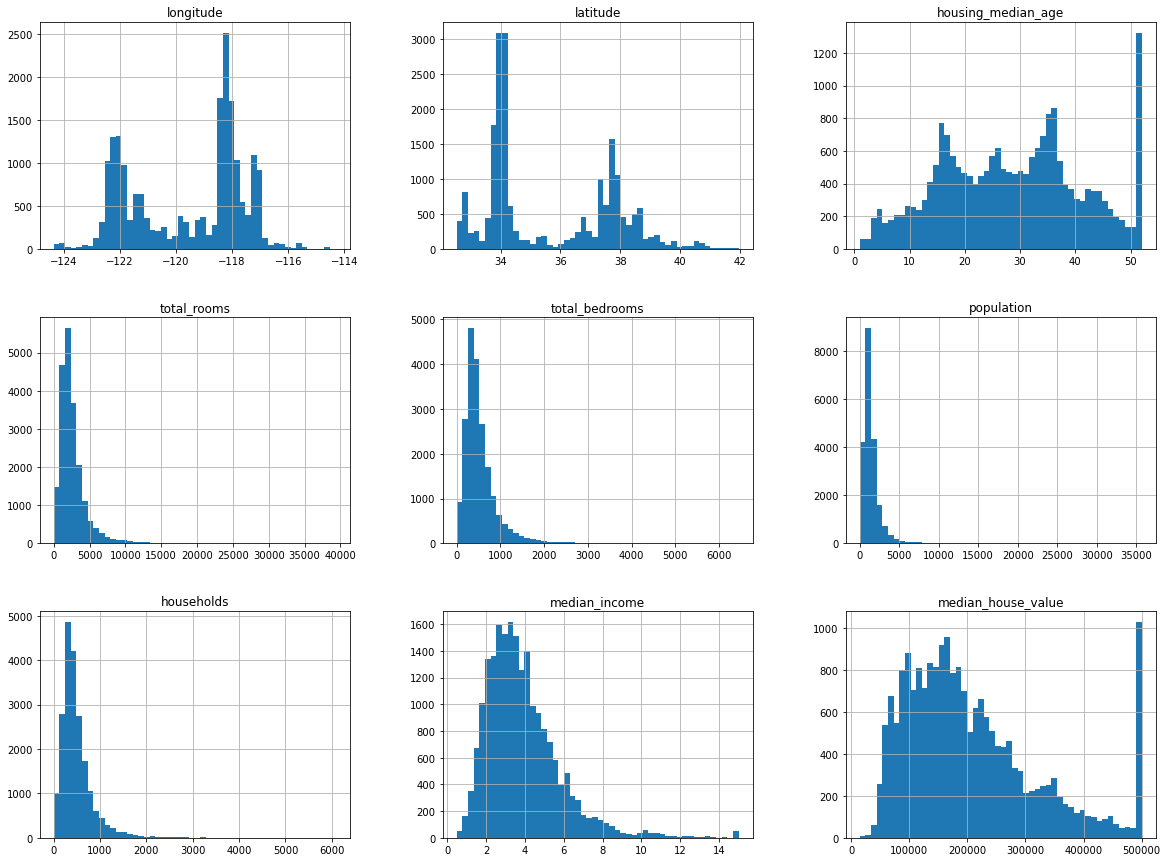

In [14]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## 2.3.4 테스트 세트 만들기

In [15]:
import numpy as np

In [16]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set,test_set = split_train_test(housing,0.2)

In [18]:
len(train_set)

16512

In [19]:
len(test_set)

4128

In [20]:
from zlib import crc32

In [21]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))& 0xfffffff < test_ratio * 2**32

In [22]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [23]:
housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id, 0.2,"index")

In [24]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

In [27]:
housing["income_cat"]= pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

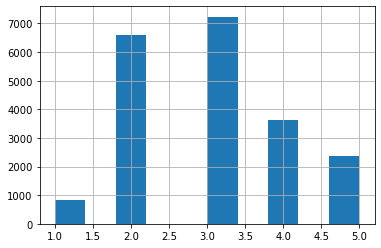

In [28]:
housing["income_cat"].hist()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [31]:
for train_index,test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [32]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

# 2.4 데이터 이해를 위한 탐색과 시각화 

In [34]:
housnig = strat_train_set.copy()
# 훈련 세트를 손상시키지 않기 위해 복사본을 만들어서 사용

## 2.4.1 지리적 데이터 시각화 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

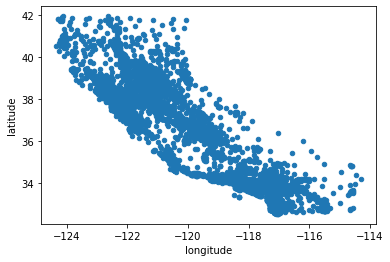

In [80]:
housing.plot(kind="scatter",x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

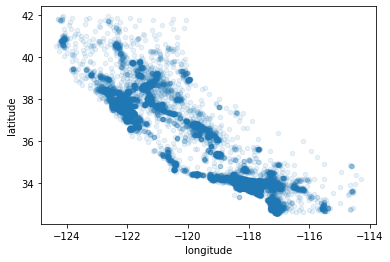

In [81]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

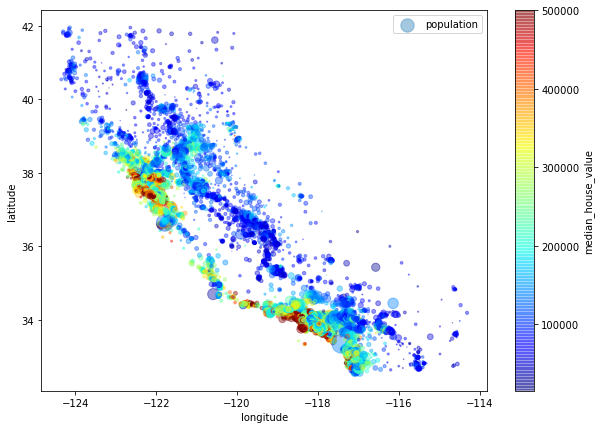

In [82]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100, label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend()

## 2.4.2 상관관계 조사

In [83]:
corr_matrix = housing.corr()

In [84]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [85]:
from pandas.plotting import scatter_matrix

In [86]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

In [87]:
from pylab import *

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

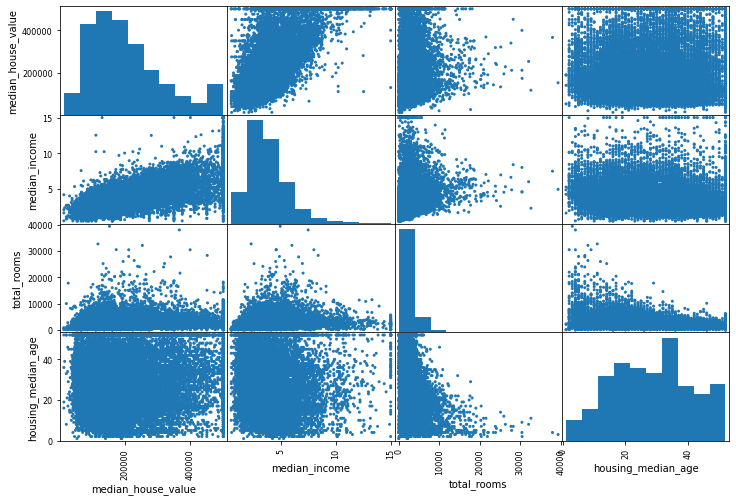

In [88]:
scatter_matrix(housing[attributes],figsize(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

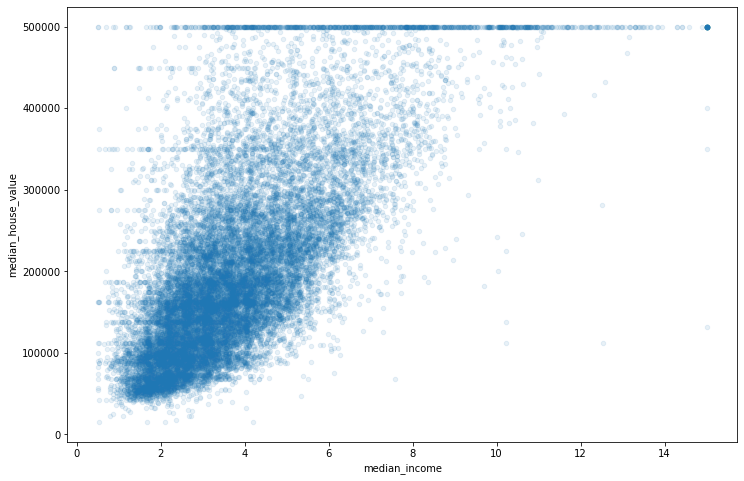

In [89]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

## 2.4.3 특성 조합으로 실험 

In [90]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [96]:
corr_matrix=housing.corr()

In [97]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


In [98]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64